### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

Алгоритм не сошелся шаг 799 weight_evolution 73829661091.645432
r2-score -3705250042287336636547072.000000


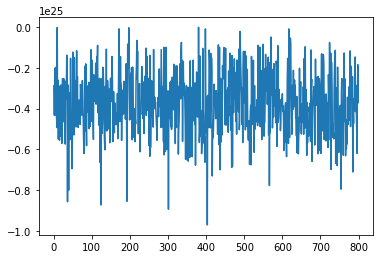

In [11]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
import matplotlib.pyplot as plt



boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
sgd_regressor = SGDRegressor(learning_rate='constant',eta0=0.0001,fit_intercept=True,random_state=42)
w_current = np.random.random(X_train.shape[1])
epsilon = 0.0001
weight_evolution, r2score_evolution =[],[]
for step in list(range(800)):
        sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
        weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
        if weight_evolution[-1]<epsilon:
            print("Итарации остановлены на шаге %d" % step); break
        r2score_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
        w_current = sgd_regressor.coef_.copy()
if weight_evolution[-1]>epsilon:
        print("Алгоритм не сошелся шаг %d weight_evolution %f" % (step, weight_evolution[-1]))
        step+=1
    
plt.plot(range(step), r2score_evolution)
print("r2-score %f" % r2_score(y_test, sgd_regressor.predict(X_test)))

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.